# Seattle Wheather

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [118]:
df = pd.read_csv('seattle-weather.csv')

In [119]:
df.head()

date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [121]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [122]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [123]:
df.describe()

precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

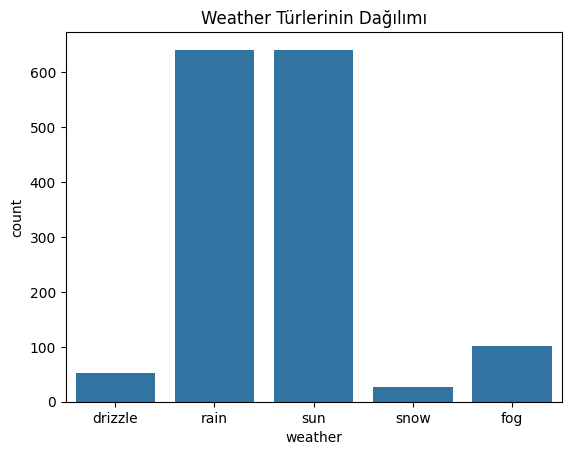

In [124]:
sns.countplot(x='weather', data=df)
plt.title("Weather Türlerinin Dağılımı")
plt.show()

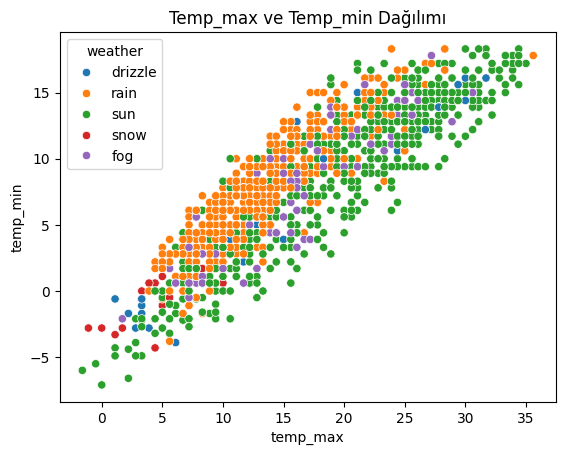

In [125]:
# Temp_min ve temp_max'in ilişkisinin görselleştirilmesi
sns.scatterplot(x='temp_max', y='temp_min', hue='weather', data=df)
plt.title("Temp_max ve Temp_min Dağılımı")
plt.show()

## Naive Bayes Algorithm

In [126]:
# Tarih sütunu gereksiz, bu yüzden çıkarıyoruz
df1 = df.drop(columns=['date'])

In [127]:
weather_mapping = {
    'drizzle': 0,
    'rain': 1,
    'sun': 2,
    'snow': 3,
    'fog': 4
}

In [128]:
df1['weather_encoded'] = df1['weather'].map(weather_mapping)

In [129]:
# 'weather_encoded' etiketimiz olacak, geri kalanı özellik
X1 = df1.drop(columns=['weather', 'weather_encoded'])
y1 = df1['weather_encoded']

In [130]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [131]:
naive_bayes_model = GaussianNB()

In [132]:
naive_bayes_model.fit(X1_train, y1_train)

GaussianNB()

In [133]:
y1_pred = naive_bayes_model.predict(X1_test)

In [134]:
print("Accuracy: ", accuracy_score(y1_test, y1_pred))  # Doğruluk oranı
print("Classification Report: \n", classification_report(y1_test, y1_pred))  # Ayrıntılı rapor


Accuracy:  0.8293515358361775
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.96      0.91      0.94       120
           2       0.76      0.99      0.86       131
           3       0.57      0.50      0.53         8
           4       0.00      0.00      0.00        25

    accuracy                           0.83       293
   macro avg       0.46      0.48      0.47       293
weighted avg       0.75      0.83      0.78       293



c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\csm_h\OneDrive\Masaüstü\GelecekHayalim-VeriBilimi\Week-5\datasets\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

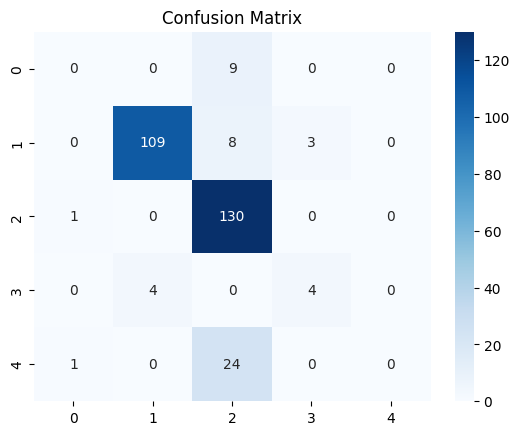

In [135]:
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Decision Trees

In [136]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [137]:
# Özellikler ve hedef değişken
X2 = df1[['precipitation', 'temp_max', 'temp_min', 'wind']]
y2 = df1['weather_encoded']


In [138]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [139]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=42)

In [140]:
y2_pred = dt_model.predict(X2_test)

In [141]:
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))
print("Accuracy:", accuracy_score(y2_test, y2_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.90      0.88      0.89       120
           2       0.78      0.77      0.77       131
           3       0.36      0.50      0.42         8
           4       0.24      0.20      0.22        25

    accuracy                           0.73       293
   macro avg       0.46      0.47      0.46       293
weighted avg       0.75      0.73      0.74       293

Accuracy: 0.7337883959044369


In [142]:
conf_matrix = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[  0   0   8   0   1]
 [  1 105   7   7   0]
 [ 11   4 101   0  15]
 [  0   4   0   4   0]
 [  2   4  14   0   5]]


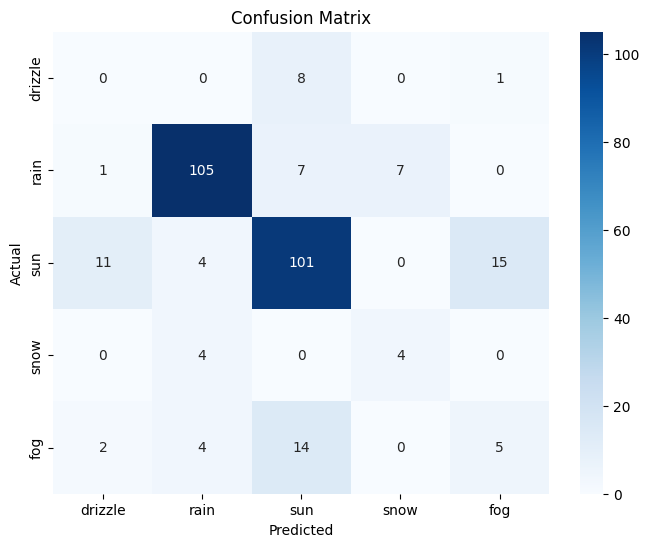

In [143]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=weather_mapping.keys(), yticklabels=weather_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

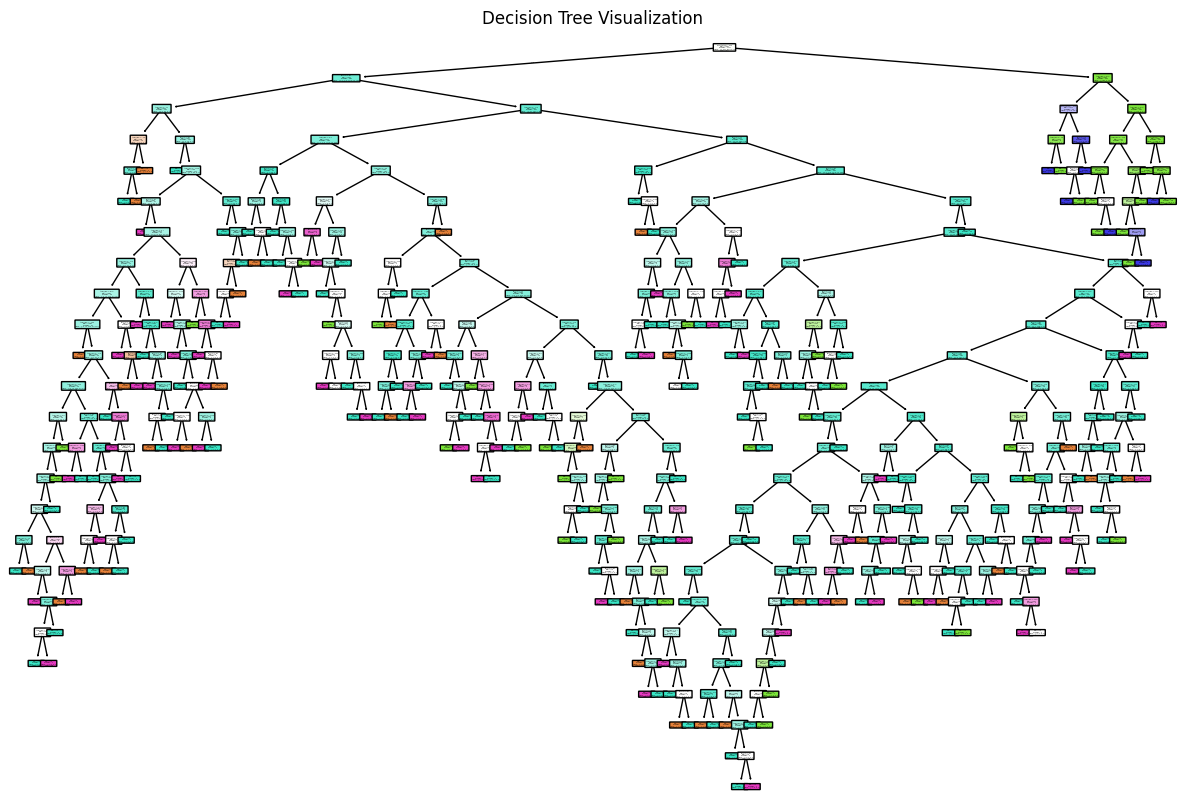

In [144]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X2.columns, class_names=[str(i) for i in weather_mapping.keys()], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [145]:
feature_importances = pd.DataFrame({'Feature': X2.columns, 'Importance': dt_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

C:\Users\csm_h\AppData\Local\Temp\ipykernel_22756\2498930661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


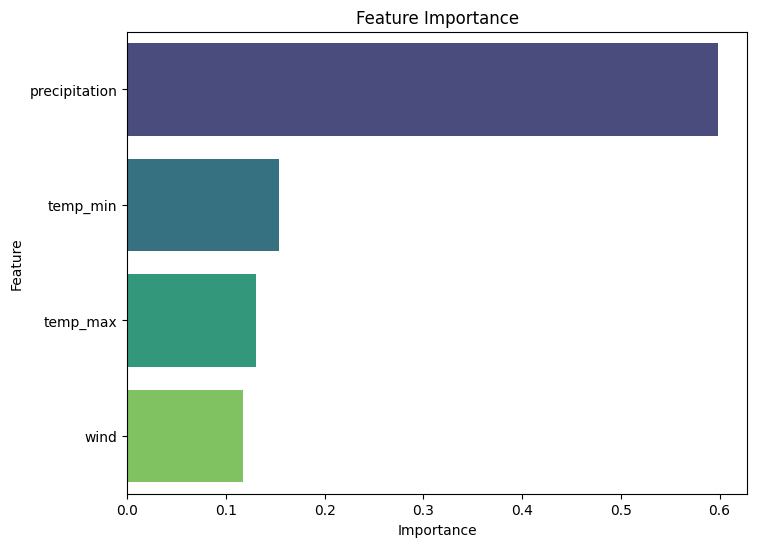

In [146]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
X3 = df1[['precipitation', 'temp_max', 'temp_min', 'wind']]
y3 = df1['weather_encoded']

In [149]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [150]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X3_train, y3_train)

RandomForestClassifier(random_state=42)

In [151]:
y3_pred = rf_model.predict(X3_test)

In [152]:
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))
print("Accuracy:", accuracy_score(y3_test, y3_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.92      0.92      0.92       120
           2       0.78      0.95      0.86       131
           3       0.40      0.25      0.31         8
           4       0.40      0.08      0.13        25

    accuracy                           0.82       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.78      0.82      0.78       293

Accuracy: 0.8156996587030717


In [153]:
conf_matrix = confusion_matrix(y3_test, y3_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[  1   0   8   0   0]
 [  0 110   7   3   0]
 [  3   1 124   0   3]
 [  0   6   0   2   0]
 [  1   2  20   0   2]]


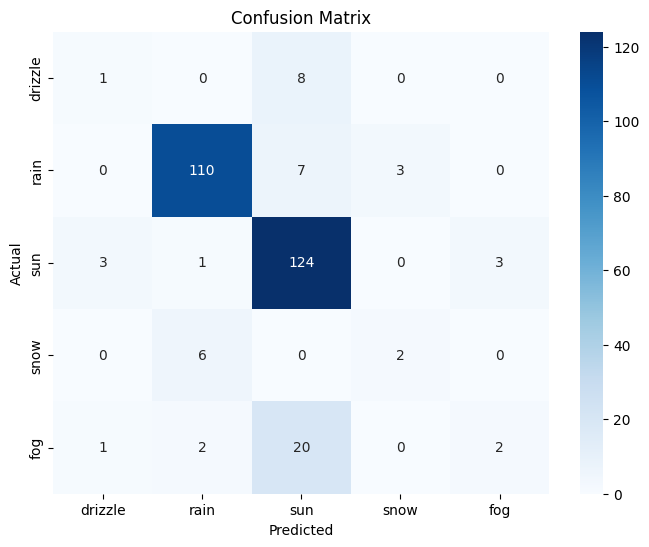

In [154]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=weather_mapping.keys(), yticklabels=weather_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [155]:
feature_importances = pd.DataFrame({'Feature': X3.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

C:\Users\csm_h\AppData\Local\Temp\ipykernel_22756\2498930661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


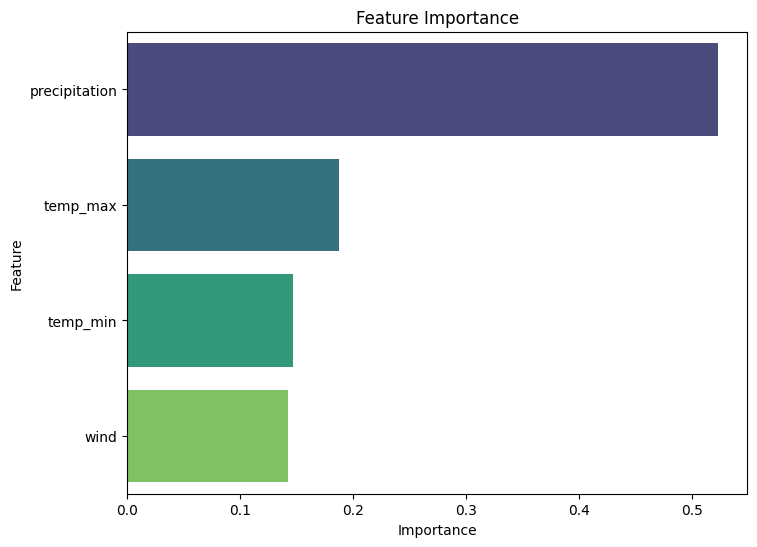

In [156]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [157]:
from sklearn.tree import plot_tree

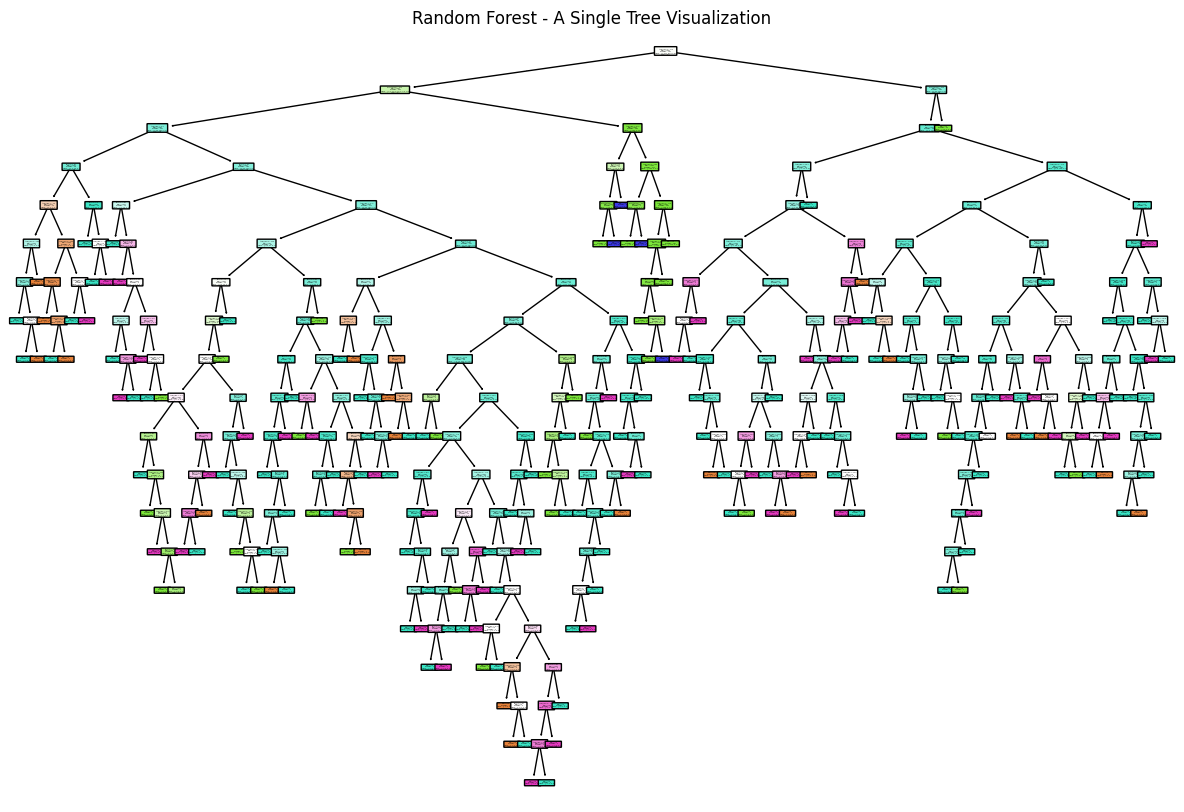

In [158]:
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], feature_names=X3.columns, class_names=[str(i) for i in weather_mapping.keys()], filled=True, rounded=True)
plt.title("Random Forest - A Single Tree Visualization")
plt.show()